In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime



In [2]:
# Load the dataset
df = pd.read_csv("climate_action_data.csv")

In [12]:
# Initial Inspection
print("Shape", df.shape)
print("\nFirst five columns",df.head())


Shape (913, 10)

First five columns   Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                          36.0                       29.4   
3     Maize                          85.8                       19.6   
4     Wheat                          75.6                       29.9   

  Drone_Image_ID  
0       IMG-2000  
1       IMG-2001  

In [11]:
# Initail inspection
print("\nData Types", df.dtypes)


Data Types Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object


In [15]:
# Initail inspection
print("Missing values", df.isnull().sum())

Missing values Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [ ]:
# Handling missing values in date
df["Date"] = pd.to_datetime(df["Date"], errors = "coerce")

In [24]:
# Filling in missing date with median
median_date = df["Date"].median()
df["Date"] = df["Date"].fillna(median_date)

# Handling and Filling in missing crop type with mode
most_Frequent = df["Crop_Type"].mode()[0]
df["Crop_Type"] = df["Crop_Type"].fillna(most_Frequent)

In [25]:
# Checking for missing values again
print("Missing values", df.isnull().sum())

Missing values Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [ ]:
# Showing duplicates
print("Duplicates", df.duplicated(keep=False))

Duplicates 0      False
1      False
2      False
3       True
4      False
       ...  
908     True
909     True
910     True
911     True
912     True
Length: 913, dtype: bool


In [33]:
# dropping duplicate
df = df.drop_duplicates()

print("After dropping duplicates", df.duplicated())

After dropping duplicates 0      False
1      False
2      False
3      False
4      False
       ...  
797    False
798    False
799    False
801    False
863    False
Length: 802, dtype: bool


In [34]:
# Replacing "error" with NaN
df.replace('error', np.nan, inplace=True)

In [35]:
#Descriptive Statistics
print(df.describe())

                                Date
count                            802
mean   2026-02-04 07:36:03.591022336
min              2025-01-01 00:00:00
25%              2025-07-20 06:00:00
50%              2026-02-03 00:00:00
75%              2026-08-22 18:00:00
max              2027-03-11 00:00:00


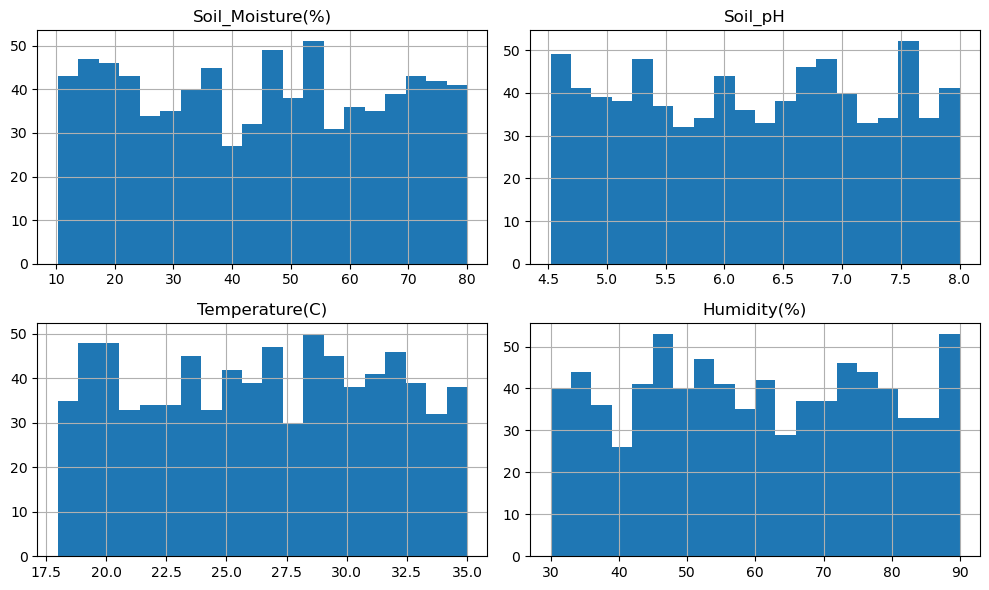

In [37]:
# Visualisation
numeric_cols = ["Soil_Moisture(%)", "Soil_pH", "Temperature(C)", "Humidity(%)"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

df[numeric_cols].hist(figsize=(10, 6), bins=20)
plt.tight_layout()
plt.show()

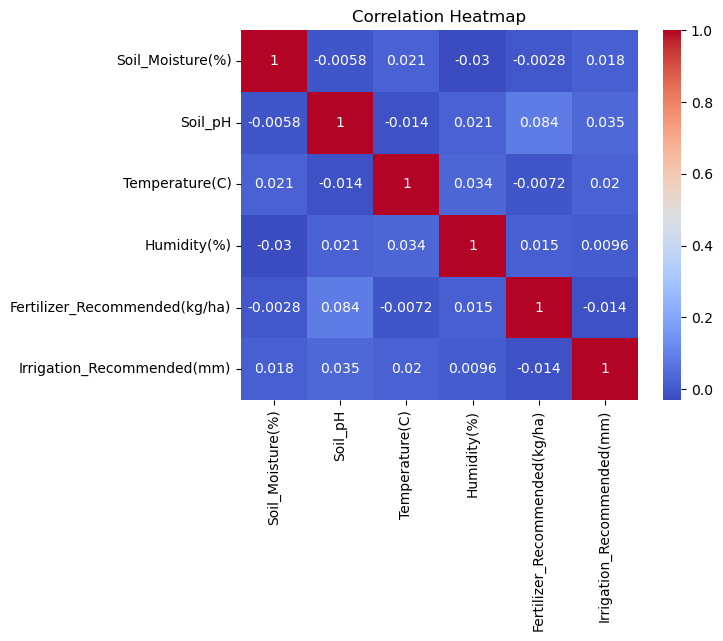

In [38]:
# Heat map
corr = df[numeric_cols + ["Fertilizer_Recommended(kg/ha)", "Irrigation_Recommended(mm)"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [40]:
# crop with the Hiighest Average soil moisture
crop_moisture = df.groupby("Crop_Type")["Soil_Moisture(%)"].mean().sort_values(ascending=False)
print("\nAverage Soil Moisture by Crop:")
print(crop_moisture)


Average Soil Moisture by Crop:
Crop_Type
Wheat       47.368857
Maize       44.952078
Beans       44.389139
Tomatoes    43.809760
Lettuce     42.970200
Name: Soil_Moisture(%), dtype: float64


In [45]:
# Irrigation Adjustments
high_temp_crops = df[df["Temperature(C)"] > 30].groupby("Crop_Type")["Soil_Moisture(%)"].mean()
print(high_temp_crops)

# If moisture is low, recommend increased irrigation
for crop, moisture in high_temp_crops.items():
    if moisture < df["Soil_Moisture(%)"].mean():
        print(f"Recommend increased irrigation for {crop}.")


Crop_Type
Beans       46.549038
Lettuce     42.661892
Maize       44.885091
Tomatoes    48.647391
Wheat       44.092432
Name: Soil_Moisture(%), dtype: float64
Recommend increased irrigation for Lettuce.
Recommend increased irrigation for Wheat.


In [47]:
# Exporting csv
df.to_csv("cleaned_climate_action_data.csv", index=False)
